In [19]:
!pip install PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({"id": "170Edb4pqjRNjNHm7OWiYkuaGlA0yRCCc"}) #이부분 수정하면 됩니당
download.GetContentFile("ratings_test.txt")

In [0]:
download = drive.CreateFile({"id": "1Dn8h7wDHf4WWS4_vKNHyJ7qUVer3Aumx"}) #이부분 수정하면 됩니당
download.GetContentFile("ratings_train.txt")

In [24]:
############Konlpy 설치 ##########################

!apt-get update
!apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip3 install JPype1-py3
!pip3 install konlpy
!JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:5 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [760 kB]
Get:13 http:/

In [0]:
def read_data(filename):
    with open(filename, 'r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        # txt 파일의 헤더(id document label)는 제외하기
        data = data[1:]
    return data

train_data = read_data('ratings_train.txt')
test_data = read_data('ratings_test.txt')

In [26]:
len(train_data), len(test_data)


(150000, 50000)

In [0]:
from konlpy.tag import Twitter

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
twitter = Twitter()
print(twitter.pos(u'지은아 오빠는 말이야 지금 막 서른인데'))

[('지은아', 'Noun'), ('오빠', 'Noun'), ('는', 'Josa'), ('말', 'Noun'), ('이야', 'Josa'), ('지금', 'Noun'), ('막', 'Noun'), ('서른', 'Noun'), ('인데', 'Josa')]


In [0]:
import json
import os
from pprint import pprint

def tokenize(doc):
    # norm은 정규화, stem은 근어로 표시하기를 나타냄
    return ['/'.join(t) for t in twitter.pos(doc, norm=True, stem=True)]


In [35]:
if os.path.isfile('train_docs.json'):
    with open('train_docs.json') as f:
        train_docs = json.load(f)
    with open('test_docs.json') as f:
        test_docs = json.load(f)
else:
    train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
    test_docs = [(tokenize(row[1]), row[2]) for row in test_data]
    # JSON 파일로 저장
    with open('train_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(train_docs, make_file, ensure_ascii=False, indent="\t")
    with open('test_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(test_docs, make_file, ensure_ascii=False, indent="\t")
        
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

2159921


이제 이 데이터를 nltk 라이브러리를 통해서 전처리를 해볼텐데요, Text 클래스는 문서를 편리하게 탐색할 수 있는 다양한 기능을 제공합니다.

여기에서는 vocab().most_common 메서드를 이용해서 데이터에서 가장 자주 사용되는 단어를 가져올 때 사용하겠습니다.

In [36]:
import nltk
text = nltk.Text(tokens, name='NMSC')

# 전체 토큰의 개수
print(len(text.tokens))

# 중복을 제외한 토큰의 개수
print(len(set(text.tokens)))            

# 출현 빈도가 높은 상위 토큰 10개
pprint(text.vocab().most_common(10))

2159921
49895
[('./Punctuation', 67778),
 ('영화/Noun', 50818),
 ('하다/Verb', 41209),
 ('이/Josa', 38540),
 ('보다/Verb', 38538),
 ('의/Josa', 30188),
 ('../Punctuation', 29055),
 ('가/Josa', 26627),
 ('에/Josa', 26468),
 ('을/Josa', 23118)]


In [37]:
# 일단 import 
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

# 우선 fm._rebuild() 를 해주고
fm._rebuild()
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

sys_font number: 69
['/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-BoldOblique.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-Oblique.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSans-BoldOblique.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-BoldOblique.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype

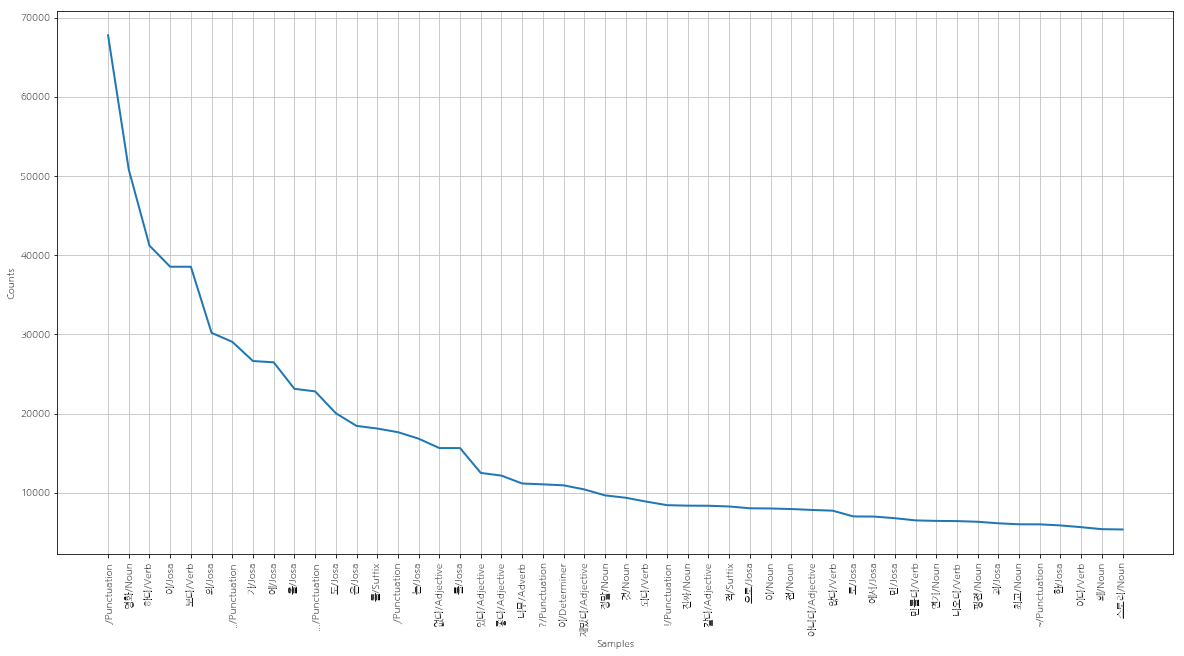

In [38]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline



plt.figure(figsize=(20,10))
text.plot(50)

In [0]:
from tqdm import trange
import numpy as np

In [0]:
#시간이 꽤 걸립니다! 시간을 절약하고 싶으면 most_common의 매개변수를 줄여보세요.
selected_words = [f[0] for f in text.vocab().most_common(10000)]

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

In [0]:
  train_docs = train_docs[:150000]
test_docs = test_docs[:10000]

train_y = np.array([c for _, c in train_docs]).astype("int8")
test_y = np.array([c for _, c in test_docs]).astype("int8")

len(train_docs), len(test_docs)

geneorator_train = (i for i in train_docs)
geneorator_test = (i for i in train_docs)

train_x = np.empty(shape = (150000, 10000)).astype("float32")
test_x = np.empty(shape = (10000, 10000)).astype("float32")

for index in trange(len(train_docs)):
  if index <= 9999:
    temp1 = next(geneorator_train)
    temp2 = next(geneorator_test)
    
    doc1 = term_frequency(temp1[0])
    doc2 = term_frequency(temp2[0])
    train_x[index, : ] = doc1
    test_x[index, : ] = doc2
    
  else:
    temp1 = next(geneorator_train)
    doc1 = term_frequency(temp1)
    train_x[index, : ] = doc1

  4%|▍         | 6280/150000 [00:45<17:39, 135.60it/s]

KeyboardInterrupt: ignored

In [0]:
import pickle

download = drive.CreateFile({"id": "1uN-QICBfMITscCLSLez6iSoGPJZEfuxj"}) #이부분 수정하면 됩니당
download.GetContentFile("X.pickle")
download = drive.CreateFile({"id": "13kddFd2xIR8C0Emb3Wi7PtuGCgkwC994"}) #이부분 수정하면 됩니당
download.GetContentFile("y.pickle")

with open('X.pickle' , 'rb') as f:
    X = pickle.load(f)
    
with open('y.pickle' , 'rb') as f:
    y = pickle.load(f)

In [42]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, random_state = 42, test_size = .3)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((35000, 10000), (15000, 10000), (35000,), (15000,))

In [48]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

model.fit(train_x, train_y, epochs=20, batch_size=512)
results = model.evaluate(test_x, test_y)

W0829 03:03:52.651273 140687035586432 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0829 03:03:52.760205 140687035586432 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
35000/35000 [==============================] - 2s 61us/sample - loss: 0.4715 - binary_accuracy: 0.8003
Epoch 2/20
35000/35000 [==============================] - 1s 33us/sample - loss: 0.3288 - binary_accuracy: 0.8647
Epoch 3/20
35000/35000 [==============================] - 1s 33us/sample - loss: 0.2874 - binary_accuracy: 0.8833
Epoch 4/20
35000/35000 [==============================] - 1s 33us/sample - loss: 0.2555 - binary_accuracy: 0.8965
Epoch 5/20
35000/35000 [==============================] - 1s 33us/sample - loss: 0.2253 - binary_accuracy: 0.9104
Epoch 6/20
35000/35000 [==============================] - 1s 33us/sample - loss: 0.1967 - binary_accuracy: 0.9233
Epoch 7/20
35000/35000 [==============================] - 1s 32us/sample - loss: 0.1693 - binary_accuracy: 0.9344
Epoch 8/20
35000/35000 [==============================] - 1s 33us/sample - loss: 0.1457 - binary_accuracy: 0.9440
Epoch 9/20
35000/35000 [==============================] - 1s 34us/sample - loss: 0.1239 

In [0]:

def predict_pos_neg(review):
    token = tokenize(review)
    tf = term_frequency(token)
    data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)
    score = float(model.predict(data))
    if(score > 0.5):
        print("[{}]는 {:.2f}% 확률로 긍정 리뷰이지 않을까 추측해봅니다.^^\n".format(review, score * 100))
    else:
        print("[{}]는 {:.2f}% 확률로 부정 리뷰이지 않을까 추측해봅니다.^^;\n".format(review, (1 - score) * 100))
        
   

In [50]:
predict_pos_neg("올해 최고의 영화! 세 번 넘게 봐도 질리지가 않네요.")
predict_pos_neg("배경 음악이 영화의 분위기랑 너무 안 맞았습니다. 몰입에 방해가 됩니다.")
predict_pos_neg("주연 배우가 신인인데 연기를 진짜 잘 하네요. 몰입감 ㅎㄷㄷ")
predict_pos_neg("믿고 보는 감독이지만 이번에는 아니네요")
predict_pos_neg("주연배우 때문에 봤어요")

[올해 최고의 영화! 세 번 넘게 봐도 질리지가 않네요.]는 100.00% 확률로 긍정 리뷰이지 않을까 추측해봅니다.^^

[배경 음악이 영화의 분위기랑 너무 안 맞았습니다. 몰입에 방해가 됩니다.]는 99.53% 확률로 긍정 리뷰이지 않을까 추측해봅니다.^^

[주연 배우가 신인인데 연기를 진짜 잘 하네요. 몰입감 ㅎㄷㄷ]는 100.00% 확률로 긍정 리뷰이지 않을까 추측해봅니다.^^

[믿고 보는 감독이지만 이번에는 아니네요]는 71.27% 확률로 부정 리뷰이지 않을까 추측해봅니다.^^;

[주연배우 때문에 봤어요]는 65.69% 확률로 긍정 리뷰이지 않을까 추측해봅니다.^^



In [54]:
predict_pos_neg("재미있는데 재미없어요.")

[재미있는데 재미없어요.]는 91.10% 확률로 부정 리뷰이지 않을까 추측해봅니다.^^;

